# Project - Business Metrics

In business institutions, management keeps track of the overall health of the business through the result of measurements called metrics, e.g. revenue and average order values. Examples of metrics that are followed by governments are GDP, inflation, and unemployment rate. 

In this project, we'll focus on  makes a good metric, and we'll explore some metrics in different business scenarios. What's important to understand is that metrics are observed across time. Metrics are calculated separately at specific points in time, but are understood in a chronological context.

Common time frames in which to calculate metrics are days, weeks, or months. Which time frame to use depends on factors like importance, data availability, and how dynamic the metric is.

### What's a Good Metric
A good metric should have the following characteristics:

- Accurate
- Simple and intelligible. To be read and understood at a glance.
- Easy to drill down into. What factors contributed to the change in the metric
- Actionable
- Dynamic.  They need to change over time.
- Standardized. Everyone sees the same thing.
- Business oriented. Need to be adjusted to the current needs of the business.
- 

### Net Promoter Score (NPS)
NPS is a customer success metric that quantifies customer satisfaction. On a scale of 0 to 10, Customers who pick:

- Anything from 0 through 6 are called `detractors`;
- 7 or 8 are called `passives`;
- 9 or 10 are called `promoters`;

**Exercise**

Create a function called `categorize` that, for each possible score, returns its respective category:

- Scores 0 through 6 should be categorized as `"Detractor"`;
- Scores 7 and 8 should be categorized as `"Passive"`;
- Scores 9 and 10 should be categorized as `"Promoter"`;

In [1]:
def categorize(i):
    if i in range(0,7):
        return "Detractor"
    
    elif i in range(7,9):   
        return "Passive"
   
    elif i in range(9,11):
        return "Promoter"
   
    return None
    

for i in range(0,11):
    print(i, ": ", categorize(i))

0 :  Detractor
1 :  Detractor
2 :  Detractor
3 :  Detractor
4 :  Detractor
5 :  Detractor
6 :  Detractor
7 :  Passive
8 :  Passive
9 :  Promoter
10 :  Promoter


### Calculating NPS
NPS is calculated as the percentage of promoters minus the percentage of detractors. 

**Dataset**

We will use the dataset `nps.csv` which has following columns:
`event_date`: The date and time in which customers completed the survey
`user_id`: A customer identifier
`score`: Their answer to the survey

The dates pertain the year of 2020 only and the dataset has no missing values, nor does it require any major data cleaning.

In [2]:
import pandas as pd
df = pd.read_csv("nps.csv", parse_dates=["event_date"])

print(df.info())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_date  3326 non-null   datetime64[ns]
 1   user_id     3326 non-null   int64         
 2   score       3326 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 78.1 KB
None
           event_date    user_id  score
0 2020-01-01 19:00:51  290067447      8
1 2020-01-02 17:34:43  223014806     10
2 2020-01-02 19:11:55  187864388     10
3 2020-01-02 19:27:00  318758952      8
4 2020-01-02 21:42:19  189933311      0


**Exercise**

- Create a numeric column in df called `yearmonth` that stores the year and the month of each row in the `yyyymm` format.
- Create a column in df called `"category"` that assigns the category corresponding to its score to each row.. Use the function `categorize` created above.

 Create a new dataframe with the NPS for each month:
- Assign to `nps` the result of using `df.pivot_table()` with:
`yearmonth` as the index
- `category` as a column
- The string size as an aggregating function

- Create a new column in `nps` whose values are the sum of the values of each row to get the total number of responses for the month. This column should be called `total_responses`.
- Subtract detractors from the promoters and divide the result by the total_responses column. Assign the result of this computation to `nps`
- Multiply the nps column by 100, cast it as integer using the Series.astype() method. Assign it back to `nps["nps"]`.

In [3]:
# creating numeric column yyyymm
date = df["event_date"].dt.date.astype(str)

df["yearmonth"] = date.str[0:8].str.replace("-","").astype(int)

print(df.info())
print(df.sample(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_date  3326 non-null   datetime64[ns]
 1   user_id     3326 non-null   int64         
 2   score       3326 non-null   int64         
 3   yearmonth   3326 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2)
memory usage: 91.1 KB
None
              event_date    user_id  score  yearmonth
1974 2020-07-15 13:35:34  372965077      9     202007
81   2020-01-11 13:36:52  189932310      2     202001
3008 2020-10-20 22:54:22  296448557      9     202010
35   2020-01-07 17:55:24  189932592      7     202001
1440 2020-06-01 01:19:53  396961365     10     202006


In [4]:
# Creating 'category' column

df["category"] = df["score"].apply(categorize)

print(df.info())
print(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_date  3326 non-null   datetime64[ns]
 1   user_id     3326 non-null   int64         
 2   score       3326 non-null   int64         
 3   yearmonth   3326 non-null   int32         
 4   category    3326 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 117.1+ KB
None
              event_date    user_id  score  yearmonth  category
746  2020-03-24 04:15:14  308956353     10     202003  Promoter
1528 2020-06-09 15:06:01  400824226      7     202006   Passive
2689 2020-09-10 17:00:10  133821318     10     202009  Promoter
1348 2020-05-27 03:35:09  130108031      9     202005  Promoter
3096 2020-11-03 07:15:45  166294393     10     202011  Promoter


In [5]:
# Creating the dataframe "nps"

nps = df.pivot_table(index="yearmonth", columns="category", aggfunc="size")

print(nps.info())
print(nps.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 202001 to 202012
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Detractor  12 non-null     int64
 1   Passive    12 non-null     int64
 2   Promoter   12 non-null     int64
dtypes: int64(3)
memory usage: 384.0 bytes
None
category   Detractor  Passive  Promoter
yearmonth                              
202001            31       82       215
202002            22       90       161
202003            33       72       125
202004            36       87       178
202005            33       83       191


In [6]:
# Create a new column "total_responses"
nps["total_responses"] = nps.sum(axis=1)

print(nps.head())

category   Detractor  Passive  Promoter  total_responses
yearmonth                                               
202001            31       82       215              328
202002            22       90       161              273
202003            33       72       125              230
202004            36       87       178              301
202005            33       83       191              307


In [7]:
# calculate nps

nps["nps"] = ((nps["Promoter"] - nps["Detractor"])/ nps["total_responses"])*100
nps["nps"] = nps["nps"].astype(int)
print(nps.info())
print(nps.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 202001 to 202012
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Detractor        12 non-null     int64
 1   Passive          12 non-null     int64
 2   Promoter         12 non-null     int64
 3   total_responses  12 non-null     int64
 4   nps              12 non-null     int32
dtypes: int32(1), int64(4)
memory usage: 528.0 bytes
None
category   Detractor  Passive  Promoter  total_responses  nps
yearmonth                                                    
202001            31       82       215              328   56
202002            22       90       161              273   50
202003            33       72       125              230   40
202004            36       87       178              301   47
202005            33       83       191              307   51


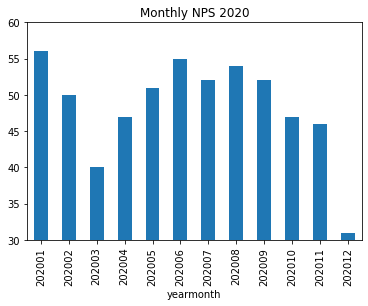

In [8]:
# Plotting nps

nps["nps"].plot(kind='bar',title='Monthly NPS 2020', ylim=(30,60), legend=False)

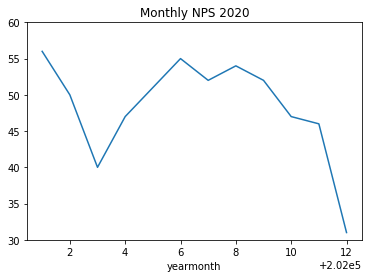

In [9]:
nps["nps"].plot(kind='line',title='Monthly NPS 2020', ylim=(30,60), legend=False)

### Customer Churn

Customer churn is an esoteric concept, but generally, when a customer stops being a customer, we say the customer has churned. 

Churn rate is the percentage of customers that churned in a given time period.

**# Churned Customers/# Total Customers**



**Scenario**
We purchased our local gym "Muscle Labs" from its previous owners in January 2013. We immediately took the opportunity to make a New Year's Resolution promo where people could sign up for the whole year and pay $500 instead of $50 per month. We decided to use the traditional subscription model used in gyms where customers pay an installment per month to access the gym. A customer churns when they elect not to pay the installment. The **dataset** we'll be using consists is stored in the file `muscle_labs.csv`and consists of folloing columns:

`id`: The subscription ID; a customer can appear multiple times in this dataset by virtue of having multiple subscriptions instead of a continuous one
`customer_id`: The customer's ID
`end_date`: The actual (if in the past) or estimated (if in the future) end date of the subscription
`start_date`: The subscription start date
`subscription_period`: Specifies whether it is a monthly or annual subscription
`price`: The price

It is now December 2014, and before new year, we have decided to track the monthly churn rate from before you owned(January 2013) the gym up to last month (November 2014). 

**Exercise**
 Read in the dataset into a dataframe called `subs`.
 - Use the `parse_dates` argument in `pd.read_csv` to parse the dates appropriately.
- Create an integer column in `subs` called `churn_month` that is the `end_date` column in yyyymm format.
- Find the number of churned customers per month:
 - Group by `churn_month` and count the number of rows.
 - Assign this data to a dataframe called monthly_churn.
  - The (only) column should be named `total_churned`.
- Display `monthly_churn`.

In [10]:
import pandas as pd
subs = pd.read_csv("muscle_labs.csv", parse_dates = ["end_date","start_date"])

print(subs.info(), '\n')
print(subs.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10497 non-null  int64         
 1   customer_id          10497 non-null  int64         
 2   end_date             10497 non-null  datetime64[ns]
 3   start_date           10497 non-null  datetime64[ns]
 4   subscription_period  10497 non-null  object        
 5   price                10497 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 492.2+ KB
None 

    id  customer_id            end_date          start_date  \
0    5         1337 2014-12-28 01:40:57 2014-10-25 12:39:18   
1   28         1338 2014-11-19 01:48:05 2014-10-17 13:47:59   
2   44         1339 2014-11-01 20:56:37 2014-10-30 05:50:54   
3   85         1340 2014-12-09 02:51:57 2013-12-05 14:51:57   
4  168         1341 2015-11-16 09:19:29 201

In [11]:
# creating numeric column yyyymm
date = subs["end_date"].dt.date.astype(str)

subs["churn_month"] = date.str[0:8].str.replace("-","").astype(int)

print(subs.info())
print(subs.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10497 non-null  int64         
 1   customer_id          10497 non-null  int64         
 2   end_date             10497 non-null  datetime64[ns]
 3   start_date           10497 non-null  datetime64[ns]
 4   subscription_period  10497 non-null  object        
 5   price                10497 non-null  int64         
 6   churn_month          10497 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(3), object(1)
memory usage: 533.2+ KB
None
         id  customer_id            end_date          start_date  \
826   14681         2327 2015-04-26 02:41:00 2014-04-23 14:41:00   
1288  13720         2812 2015-02-08 20:06:00 2014-02-05 08:06:00   
1296  13840         2820 2015-02-03 22:46:00 2014-01-31 10:46:00   
629   15534         2

In [12]:
# Finding monthly churn

monthly_churn = pd.DataFrame(subs.groupby("churn_month").size(), columns=["total_churned"])

print(monthly_churn.info(), '\n')
print(monthly_churn.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 201103 to 201512
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   total_churned  58 non-null     int64
dtypes: int64(1)
memory usage: 928.0 bytes
None 

             total_churned
churn_month               
201103                   8
201104                  16
201105                  29
201106                  27
201107                  37


### Date Wrangling

Because of the way we created monthly_churn, it can only contain months in which customers have churned — it could potentially be missing a few months. 
```
print(subs["start_date"].min())

2011-01-05 13:55:00

```
Above, earliest start date is of January 2011 whereas our churned data starts from March 2011 indicating some potential missing entries. We can account for this by creating and merging a dataframe of all months since January 2011 called `churn` with `monthly_churn` and then comparing statistics.  

In [13]:
years = list(range(2011,2015)) # All year since 2011
months = list(range(1,13)) # All months
yearmonths = [y*100+m for y in years for m in months] #Adding months to years to confirm with yyyymm format
yearmonths = yearmonths[:-1] # removing December 2014

churn = pd.DataFrame({"yearmonth": yearmonths})

churn.head()

,yearmonth
0,201101
1,201102
2,201103
3,201104
4,201105


**Exercise**

Use the `pandas.merge()` function to populate `churn` with the data already present in `monthly_churn`:
- The dataframe on the left should be `churn`.
- The dataframe on the right should be `monthly_churn`.
- In order not to lose any months, use a `left` kind of merge.
- Use appropriate arguments on the `left_on` and `right_index` parameters.
- Display `churn.head()`; note that it has some expected missing values.
- Use the `DataFrame.fillna()` method to input `0` inplace of missing values.
- Change the `total_churned` column to an integer format.

In [14]:
churn = pd.merge(left=churn, right=monthly_churn, how="left", left_on="yearmonth", right_index=True)

print(churn.info(), '\n')

print(churn.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yearmonth      47 non-null     int64  
 1   total_churned  45 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes
None 

   yearmonth  total_churned
0     201101            NaN
1     201102            NaN
2     201103            8.0
3     201104           16.0
4     201105           29.0


In [15]:
# Filling missing values

churn.fillna(0, inplace=True)

churn["total_churned"] = churn["total_churned"].astype(int)

print(churn.info(), '\n')

print(churn.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   yearmonth      47 non-null     int64
 1   total_churned  47 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 692.0 bytes
None 

   yearmonth  total_churned
0     201101              0
1     201102              0
2     201103              8
3     201104             16
4     201105             29


### Churn Rate

Since **Churn Rate = # Churned Customers/# Total Customers**, we have to device a method to determine the "total customers" as the number of customers can change throughout the month. We can resort to a mean value or determine the number of customers at the beginning of the month. We'll use the latter.

The number of customers at the beginning of the month are same as at the end of previous month. More concretely, given a month `ym` (from yearmonth in churn), we'll count the number of subscriptions where `start_date` comes before the first day of `ym`, and where `end_date` is after the last day of the previous month (which is to say that the `end_date` is greater than or equal to the first day of `ym`). 
This can be done by counting the number of rows of subs where `start_date` is smaller than the first day of the month and where `end_date` is greater.

**Exercise**

Create a function that takes as input an integer representing a month in the format `yyyymm` and returns the number of rows in `subs` satisfying all of the following criteria:

- `start_date` occurred before the first day of then given month
- `end_date` is later than the last day of the previous month
- Create a column in `churn` named `total_customers` that is the result of applying the function created in the previous step to `churn["yearmonth"].

Calculate the churn rate for each month:

- Divide the `total_churned` column by `total_customers`
- Assign the result to a column called `churn_rate`
- Set `yearmonth` as a string type.

Plot the churn rate across time.

In [16]:
# Create a function to count customers fulfilling above criteria

import datetime as dt

def get_customers(yearmonth):
    year = int(yearmonth/100) # integer will be rounded off to closest integer
    month = yearmonth - (year*100)
    date = dt.datetime(year, month, 1) # sets the date to 1st of month
    
    return ((subs["start_date"] < date) & (date <= subs["end_date"])).sum()
    

In [17]:
# Create total_customers column in "churn"

churn["total_customers"] = churn["yearmonth"].apply(get_customers)

churn["churn_rate"] = churn["total_churned"]/ churn["total_customers"]

churn["yearmonth"] = churn["yearmonth"].astype(str)
print(churn.info(), '\n')

print(churn.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yearmonth        47 non-null     object 
 1   total_churned    47 non-null     int32  
 2   total_customers  47 non-null     int64  
 3   churn_rate       46 non-null     float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 1.4+ KB
None 

  yearmonth  total_churned  total_customers  churn_rate
0    201101              0                0         NaN
1    201102              0               17    0.000000
2    201103              8               47    0.170213
3    201104             16               82    0.195122
4    201105             29              105    0.276190


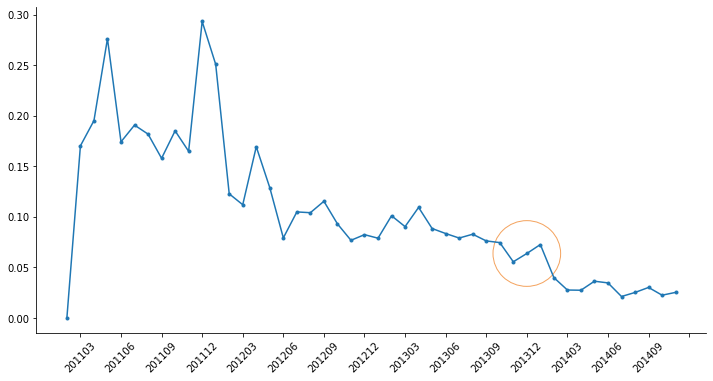

In [18]:
# Plot churn rate across time

arange = __import__("numpy").arange
Ellipse = __import__("matplotlib").patches.Ellipse

ax = churn.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".")
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
circle = Ellipse((35, churn.loc[churn.yearmonth == "201312", "churn_rate"].iloc[0]),
                 5, 0.065, color='sandybrown', fill=False
                   )
ax.add_artist(circle)
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

### Investigating Churn

Above graphs shows:

- The churn rate is very erratic at the beginning;

- In the months prior to our taking over the business in January of 2013, the churn rate started to become more stable.

- After we took over the business, there was a spike in churn. This is not surprising, maybe people just took the opportunity to change gyms or quit.

- At the end of 2013 and beginning of 2014, there was a relatively large spike in the churn rate (circled).

Drilling down into the behavior of the churn rate by type of suscription (monthly vs. annual) may give us some clues.

### Monthly Subscriptions

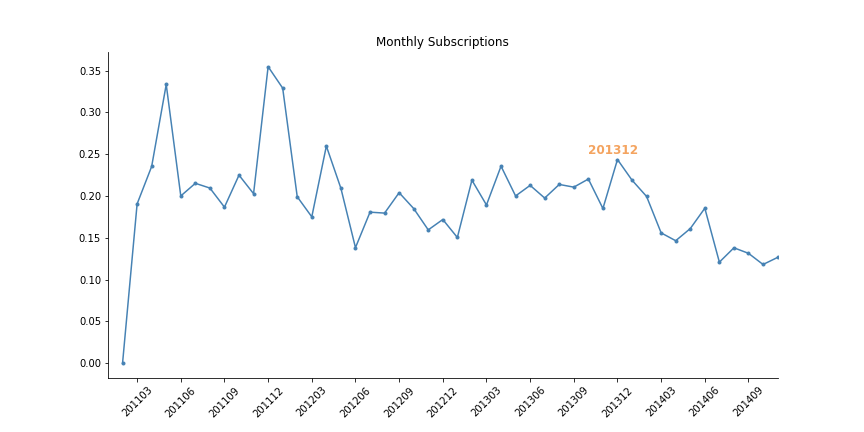

### Annual Subscriptions

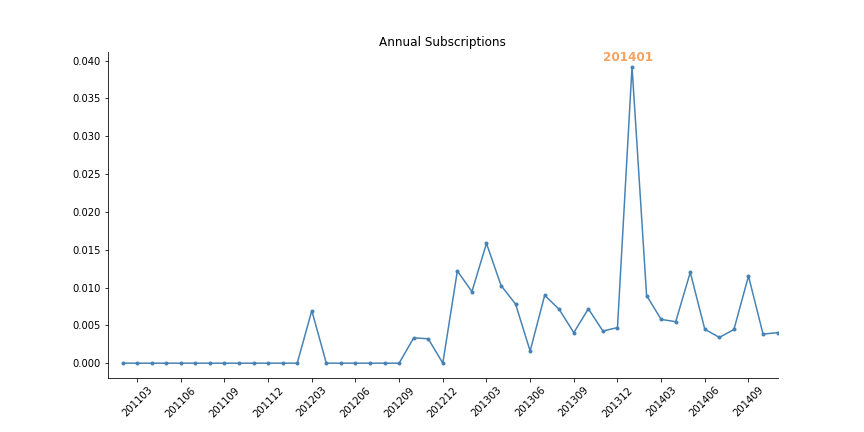

It seems the spike in churn originates from the monthly plans in December and from the annual plans in January. This is because when we took over the business in January of 2013, we made a promo where people could sign up for a year for $500. What we're seeing here is the churn due to that promotion.

A few actions that we could take to reactivate these customers are:

- Make a new promotion specifically for the quitters.
- Make a new promotion specifically for the customers who attended the gym up until the end.
- Throw in some perks in addition to the standard service for the customers who didn't quit.

### Analyzing Churn

churn rate is actionable. Moreover, it satisfies most, if not all, of the other requirements for what makes a good metric:

- Accurate
- Simple and intelligible
- Easy to drill down into
- Actionable
- Dynamic
- Standardized
- Business oriented

Reducing churn is important because:
- The more customers we lose, the smaller the pool of potential customers becomes.
- In the case of subscription based products, current customers are more likely to buy the more expensive products than new customers.
- Churn rate informs how happy customers are with our product.
- Research has shown that retaining existing customers is more profitable than acquiring new customers due primarily to savings on acquisition costs, the higher volume of service consumption, and customer referrals [(source)](https://journals.lib.unb.ca/index.php/JCIM/article/view/442).
- Happy customers provide free advertising.

Gauging churn rates, just like NPS, is also [industry-dependent](https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/):